In [24]:
import pandas as pd
import torch
from torch_geometric.data import Data
from sklearn.preprocessing import LabelEncoder

# Read the data from the Excel file
data = pd.read_excel('40000.xlsx')

# Initialize LabelEncoders
label_encoders = {}
categorical_columns = ['CompanyName', 'Customers', 'Continent', 'Country']

# Label encode categorical columns
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Mapping for label
label_map = {'yes': 1, 'no': 0}

# Process nodes and features
node_features = []
node_labels = []
for _, row in data.iterrows():
    label = row['Top500']
    label = label_map[label]
    node_labels.append(label)
    features = row[categorical_columns].values.tolist()
    node_features.append(features)

# Convert data to PyTorch tensors
x = torch.tensor(node_features, dtype=torch.long)
y = torch.tensor(node_labels, dtype=torch.float).view(-1, 1)

graphs = []
num_rows_per_graph = 100

for i in range(0, len(data), num_rows_per_graph):
    subset_data = data.iloc[i:i+num_rows_per_graph]

    # Process edges
    edges = []
    for _, row in subset_data.iterrows():
        company_name = row['CompanyName']
        customers = row['Customers']
        edges.append([company_name, customers])

    # Convert edges to PyTorch tensor
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

    # Create PyTorch Geometric Data object
    graph_data = Data(x=x[i:i+num_rows_per_graph], edge_index=edge_index, y=y[i:i+num_rows_per_graph])
    graphs.append(graph_data)

# Now graphs list contains 400 graph data objects, each with 100 rows.
print(graphs)

[Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2, 100], y=[100, 1]), Data(x=[100, 4], edge_index=[2

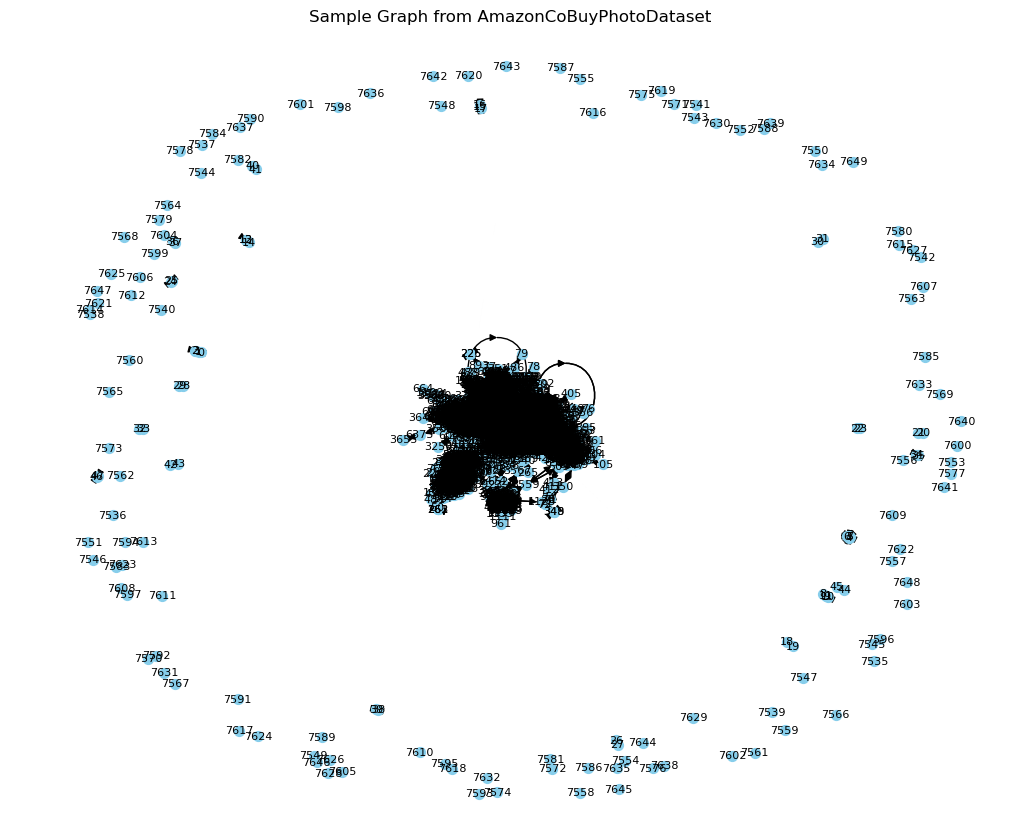

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from dgl.data import AmazonCoBuyPhotoDataset

# Load the dataset
dataset = AmazonCoBuyPhotoDataset()

# Get a sample graph
graph = dataset[0]

# Convert to NetworkX graph
nx_graph = graph.to_networkx()

# Visualize the graph
plt.figure(figsize=(10, 8))
nx.draw(nx_graph, with_labels=True, node_size=50, node_color='skyblue', font_size=8)
plt.title('Sample Graph from AmazonCoBuyPhotoDataset')
plt.show()


  NumNodes: 2708
  NumEdges: 10556
  NumFeats: 1433
  NumClasses: 7
  NumTrainingSamples: 140
  NumValidationSamples: 500
  NumTestSamples: 1000
Done loading data from cached files.


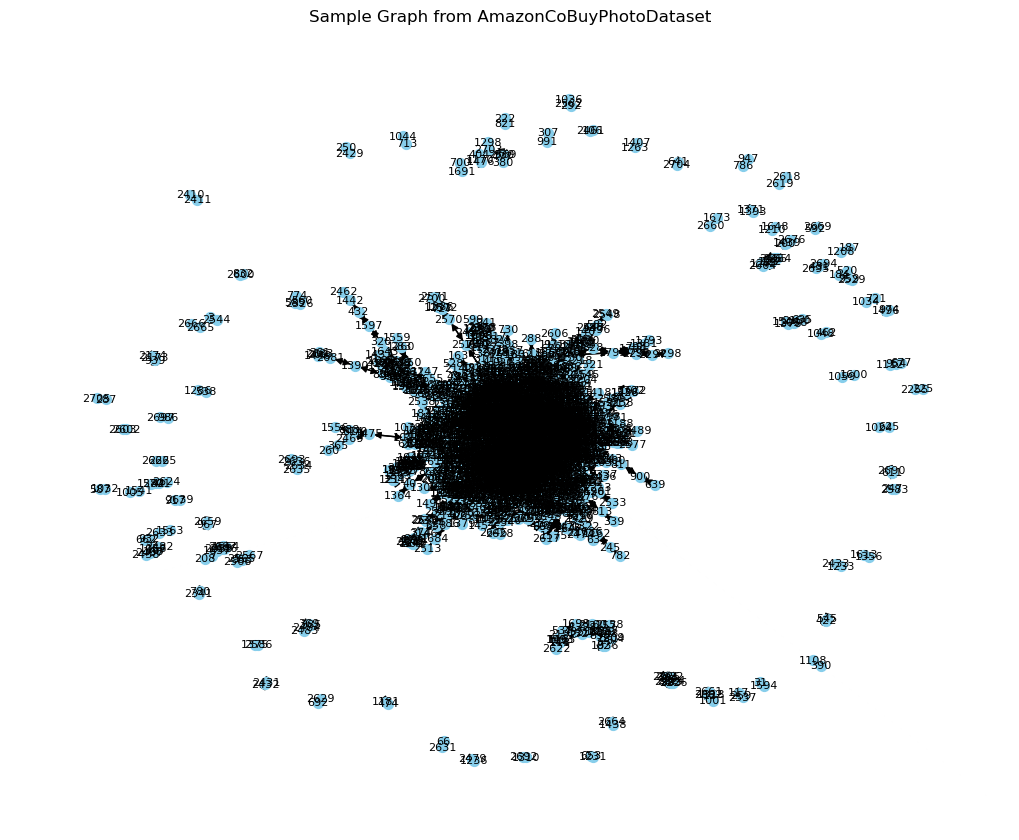

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from dgl.data import CoraGraphDataset

# Load the dataset
dataset = CoraGraphDataset()

# Get a sample graph
graph = dataset[0]

# Convert to NetworkX graph
nx_graph = graph.to_networkx()

# Visualize the graph
plt.figure(figsize=(10, 8))
nx.draw(nx_graph, with_labels=True, node_size=50, node_color='skyblue', font_size=8)
plt.title('Sample Graph from AmazonCoBuyPhotoDataset')
plt.show()
